### Test different optimizers in GPytorch on fake data 

We will try to reconstruct a sine wave with scattered data. The ultimate goal is to see if a quasi-newton optimizer works. 

In [1]:
import gpytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
np.random.seed(1234);
xr.set_options(display_style='html');

In [3]:
def fake_1d_data(n_samples, rangex=1, k=2*np.pi, eta=1): 
    
    x = rangex*np.random.rand(n_samples)
    
    x = xr.DataArray(x, dims=['sample_num'],
                    coords=[range(n_samples)])
    
    yerr = eta* np.random.randn(n_samples)
    
    y = np.sin(k*x)
    
    return x, y

In [4]:
# Generate a fake data set at some random sample points.
eta = 0.1
rangex=30 
k= 1

[x,y] = fake_1d_data(100, rangex, k, eta)

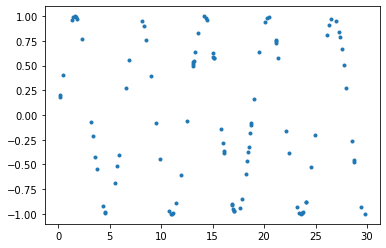

In [5]:
plt.plot(x,y,'.')

In [6]:
# convert to torch tensors, since that is what PyTorch and GPyTorch work with.
train_x = torch.from_numpy(x.values).float()
train_y = torch.from_numpy(y.values).float()